# Glovo Interview Ricardo Huarte

In [3541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from fancyimpute import KNN    
from sklearn.model_selection import train_test_split,cross_val_score, KFold, StratifiedKFold ,GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder, Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve, precision_recall_curve, \
average_precision_score,make_scorer,recall_score, accuracy_score, precision_score

from sklearn import svm

from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

## About Data Set:
You will find 2 .csv files attached to this task. 1 of the files consist of courier’s lifetime dependent features and other consist courier’s weekly variant features. Features are renamed for confidentiality purposes and data dictionary will NOT be provided. However, in 2 different .csv files, same courier ID represents same courier.

## Task 1: Exploratory Analysis and Data Munging

In this task, you are being expected to clean data, treat missing values, find out related features and finally label the data.
Every courier did not work every week. Thus, some of courier-week combinations’ data are not provided. First, come up with a way to treat these missing values. Removing missing values are not suggested since provided data set is small and it will affect your predictive model’s evaluation metric.
Create a report / dashboard and correlation matrix, in addition to results of your univariate and bivariate analysis and explain your findings.
Finally, label your data. If a specific courier’s week 9, 10 and 11 data is not provided, we label this courier as “1” otherwise “0”. After labeling, remove week 8(Yes including 8!), 9, 10 and 11 data to avoid bias in your next task. In addition, distribution of feature_3 is a hint how the data is generated.

In [3542]:
%matplotlib inline

In [3543]:
weekly = pd.read_csv(filepath_or_buffer='Courier_weekly_data.csv')

In [3544]:
weekly.head(20)

,courier,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
0,3767,2,6,34,38,0.0789,0.9211,140.4737,0.1316,2162.4737,0.7632,7.340776,8,20.208158,5.236316,0.8158,43.384804,1,19
1,3767,4,-1,42,37,0.0000,1.0000,135.5946,0.0811,2097.4054,0.9459,11.883784,19,18.855405,5.689459,0.8919,35.078042,3,11
2,3767,5,24,41,43,0.0233,0.9767,131.0930,0.0233,2043.8837,0.9302,7.072100,16,18.925116,5.138605,0.9302,31.455285,1,10
3,3767,6,-22,65,66,0.0606,0.9394,120.1515,0.0000,2124.2727,0.7727,7.356567,33,18.259697,4.704394,0.7879,34.252991,1,30
4,6282,2,9,33,27,0.0741,0.9259,100.0000,0.0370,4075.7407,0.8889,8.501233,5,26.863704,4.828519,0.8889,46.478114,1,4
5,6282,3,-20,42,56,0.0536,0.9464,113.4821,0.0357,4777.0714,0.9107,8.210125,16,23.651786,5.553571,0.9107,79.407407,2,5
6,6282,4,9,22,32,0.1250,0.8750,105.0000,0.0938,5744.1875,0.8125,8.285422,12,18.180937,5.834375,0.7813,87.250000,1,2
7,6282,5,21,31,48,0.0417,0.9583,117.2500,0.0833,4011.7708,0.9167,9.768052,17,20.346667,5.615417,0.9167,85.083333,2,9
8,6282,6,-12,52,72,0.0694,0.9306,107.6389,0.0417,4000.3333,0.8472,7.736114,17,21.941111,5.093056,0.8750,73.904915,1,13
9,6282,7,1,40,56,0.0893,0.9107,124.3750,0.0893,3192.0000,0.9107,7.405355,11,18.591071,5.353214,0.9107,65.618750,2,4


### Checking how many couriers worked on the given weeks

In [3545]:
weekly[(weekly.week==11) | (weekly.week==10) | (weekly.week==9)]['courier'].drop_duplicates().count()


387

In [3546]:
weeks=weekly.copy()

In [3547]:
# function to create the label for the pertinent weeks
def week_label(row):
    courier_set=weekly[(weekly.courier==row['courier']) & ((weekly.week==9) | (weekly.week==10) |(weekly.week==11))]
    if courier_set['courier'].count() == 0:
        label=1
    else: 
        label=0
    return label

In [3548]:
weeks['label']=weeks.apply(week_label, axis=1)


In [3549]:
# keeping only given weeks for prediction
weeks=weeks[(weeks.week<8)]

In [3550]:
weeks.head(10)

,courier,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,label
0,3767,2,6,34,38,0.0789,0.9211,140.4737,0.1316,2162.4737,0.7632,7.340776,8,20.208158,5.236316,0.8158,43.384804,1,19,1
1,3767,4,-1,42,37,0.0000,1.0000,135.5946,0.0811,2097.4054,0.9459,11.883784,19,18.855405,5.689459,0.8919,35.078042,3,11,1
2,3767,5,24,41,43,0.0233,0.9767,131.0930,0.0233,2043.8837,0.9302,7.072100,16,18.925116,5.138605,0.9302,31.455285,1,10,1
3,3767,6,-22,65,66,0.0606,0.9394,120.1515,0.0000,2124.2727,0.7727,7.356567,33,18.259697,4.704394,0.7879,34.252991,1,30,1
4,6282,2,9,33,27,0.0741,0.9259,100.0000,0.0370,4075.7407,0.8889,8.501233,5,26.863704,4.828519,0.8889,46.478114,1,4,0
5,6282,3,-20,42,56,0.0536,0.9464,113.4821,0.0357,4777.0714,0.9107,8.210125,16,23.651786,5.553571,0.9107,79.407407,2,5,0
6,6282,4,9,22,32,0.1250,0.8750,105.0000,0.0938,5744.1875,0.8125,8.285422,12,18.180937,5.834375,0.7813,87.250000,1,2,0
7,6282,5,21,31,48,0.0417,0.9583,117.2500,0.0833,4011.7708,0.9167,9.768052,17,20.346667,5.615417,0.9167,85.083333,2,9,0
8,6282,6,-12,52,72,0.0694,0.9306,107.6389,0.0417,4000.3333,0.8472,7.736114,17,21.941111,5.093056,0.8750,73.904915,1,13,0
9,6282,7,1,40,56,0.0893,0.9107,124.3750,0.0893,3192.0000,0.9107,7.405355,11,18.591071,5.353214,0.9107,65.618750,2,4,0


In [3551]:
week_corr=weeks.corr()
week_corr

,courier,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,label
courier,1.000000,-0.015157,-0.014839,-0.295018,-0.122965,-0.136194,0.136195,-0.078332,-0.015384,-0.128688,0.036512,0.103324,-0.122534,0.058832,-0.049446,-0.032731,0.159460,0.010606,-0.003218,0.059304
week,-0.015157,1.000000,-0.039383,0.107051,0.099521,-0.041087,0.041089,-0.001975,-0.241091,-0.182970,0.189028,-0.059178,0.096278,-0.036670,-0.143469,0.128672,-0.166104,0.016260,-0.046736,-0.121221
feature_1,-0.014839,-0.039383,1.000000,-0.184446,-0.107637,-0.031917,0.031922,0.070689,0.064166,0.002230,0.074508,0.039383,-0.076708,-0.011538,-0.014918,0.075377,0.118299,-0.080792,-0.146044,-0.141484
feature_2,-0.295018,0.107051,-0.184446,1.000000,0.789734,0.204216,-0.204217,0.024098,-0.007325,0.148288,-0.151889,-0.147253,0.728876,-0.190415,0.027817,0.001587,-0.177244,0.431344,0.389612,-0.321570
feature_3,-0.122965,0.099521,-0.107637,0.789734,1.000000,0.172822,-0.172824,0.076154,0.022822,0.076955,-0.083210,-0.159738,0.877003,-0.184805,-0.037864,0.061767,0.301041,0.490255,0.411608,-0.395466
feature_4,-0.136194,-0.041087,-0.031917,0.204216,0.172822,1.000000,-1.000000,-0.121234,0.003779,0.217479,-0.630019,-0.234667,0.062843,-0.305215,0.066944,-0.434895,0.002686,0.047584,0.144664,-0.036159
feature_5,0.136195,0.041089,0.031922,-0.204217,-0.172824,-1.000000,1.000000,0.121234,-0.003778,-0.217481,0.630022,0.234670,-0.062844,0.305213,-0.066947,0.434899,-0.002686,-0.047586,-0.144666,0.036156
feature_6,-0.078332,-0.001975,0.070689,0.024098,0.076154,-0.121234,0.121234,1.000000,0.163850,-0.156730,0.188016,-0.038979,0.061189,0.019752,0.233384,0.158231,0.038158,0.022463,0.006640,-0.051626
feature_7,-0.015384,-0.241091,0.064166,-0.007325,0.022822,0.003779,-0.003778,0.163850,1.000000,0.113607,0.072526,-0.027542,0.004092,-0.014958,-0.032110,0.153089,0.179909,0.070922,-0.005763,-0.067344
feature_8,-0.128688,-0.182970,0.002230,0.148288,0.076955,0.217479,-0.217481,-0.156730,0.113607,1.000000,-0.162868,-0.105808,0.052372,0.007692,0.648861,-0.106252,0.140880,0.102029,0.064077,-0.002860


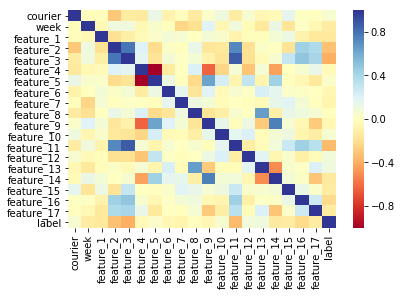

In [3552]:
sns.heatmap(week_corr, vmax=1., square=False,cmap="RdYlBu")

(array([398., 596., 676., 608., 383., 226.,  89.,  34.,   9.,   6.]),
 array([  1. ,  19.3,  37.6,  55.9,  74.2,  92.5, 110.8, 129.1, 147.4,
        165.7, 184. ]),
 <a list of 10 Patch objects>)

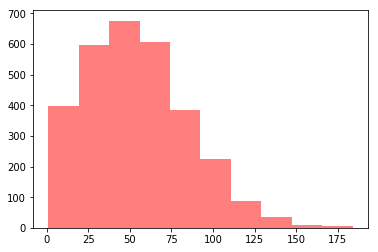

In [3553]:
plt.hist(weeks.feature_3,alpha=0.5,color='red')

Text(0.5,1,'churned')

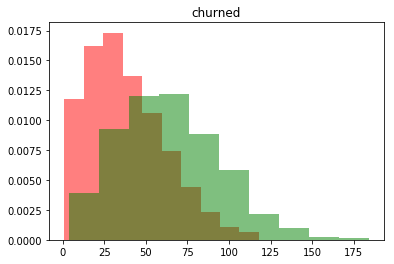

In [3554]:
#normalize histogram
plt.hist(weeks[(weeks.label==1)].feature_3,alpha=0.5,color='red',density=1)
plt.hist(weeks[(weeks.label==0)].feature_3,alpha=0.5,color='green',density=1)
plt.title('churned')

In [3555]:
def max_consecutive(vector):
    longest = 0
    current = 0
    for num in vector:
        if num == 1:
            current += 1
        else:
            longest = max(longest, current)
            current = 0

    return max(longest, current)
    

In [3556]:
def latest_streak(series):
    week_vector=[0,0,0,0,0,0,0,0]
    count=0
    
    for i in series:
        week_vector[i]=1
    reversed_week=list(reversed(week_vector))
    for i in reversed_week:
        if i==1:
            count+=1
        else: 
            break
    return count

    

In [3557]:
max_consecutive([0,1,1,1,0,0,1,0,1,1,1,1,1,1,0])

6

In [3558]:
def max_streak(series):
    week_vector=[0,0,0,0,0,0,0,0]
    
    for i in series:
        week_vector[i]=1
    streak=max_consecutive(week_vector)
    return streak
    
        
        

In [3559]:
def get_range(series):
    return max(series)-min(series)

In [3560]:
def lifetime_mean(series):
    return np.sum(series)/8

In [3561]:
aggreg=get_range
aggreg='mean'
#aggreg=lifetime_mean
aggregname='mean'



In [3562]:
# trying different aggregation methods on the data
gold=weeks.groupby(['courier','label'], as_index=False )\
.agg({'week':['count', max_streak,latest_streak],\
              'feature_1':['mean',lifetime_mean],\
               'feature_2':['mean',lifetime_mean],'feature_3':['mean',lifetime_mean]\
      ,'feature_4':['mean',lifetime_mean],'feature_5':['mean',lifetime_mean]\
      ,'feature_6':['mean',lifetime_mean],'feature_7':['mean',lifetime_mean]\
      ,'feature_8':['mean',lifetime_mean],'feature_9':['mean',lifetime_mean]\
      ,'feature_10':['mean',lifetime_mean],'feature_11':['mean',lifetime_mean]\
     ,'feature_12':['mean',lifetime_mean],'feature_13':['mean',lifetime_mean]\
     ,'feature_14':['mean',lifetime_mean],'feature_15':['mean',lifetime_mean]\
     ,'feature_16':['mean',lifetime_mean],'feature_17':['mean',lifetime_mean]})

In [4218]:
gold=weeks.groupby(['courier','label'], as_index=False )\
.agg({'week':['count', max_streak,latest_streak],\
              'feature_1':'mean',\
               'feature_2':'mean','feature_3':'mean'\
      ,'feature_4':'mean','feature_5':'mean'\
      ,'feature_6':'mean','feature_7':'mean'\
      ,'feature_8':'mean','feature_9':'mean'\
      ,'feature_10':'mean','feature_11':'mean'\
     ,'feature_12':'mean','feature_13':'mean'\
     ,'feature_14':'mean','feature_15':'mean'\
     ,'feature_16':'mean','feature_17':'mean'})

In [4219]:
gold=weeks.groupby(['courier','label'], as_index=False )\
.agg({'week':['count', latest_streak],\
              'feature_1':aggreg,\
               'feature_2':aggreg,'feature_3':aggreg\
      ,'feature_4':aggreg,'feature_5':aggreg\
      ,'feature_6':aggreg,'feature_7':aggreg\
      ,'feature_8':aggreg,'feature_9':aggreg\
      ,'feature_10':aggreg,'feature_11':aggreg\
     ,'feature_12':aggreg,'feature_13':aggreg\
     ,'feature_14':aggreg,'feature_15':aggreg\
     ,'feature_16':aggreg,'feature_17':aggreg})

In [4220]:
gold[(gold.courier==6282)]

courier label  week               feature_1  feature_2 feature_3 feature_4  \
                count latest_streak      mean       mean      mean      mean   
1    6282     0     6             6  1.333333  36.666667      48.5  0.075517   

  feature_5 feature_6    ...       feature_8 feature_9 feature_10 feature_11  \
       mean      mean    ...            mean      mean       mean       mean   
1  0.924483   111.291    ...      4300.18395  0.881117   8.317717       13.0   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  
        mean       mean       mean       mean       mean       mean  
1  21.595879   5.379692    0.88055  72.957087        1.5   6.166667  

[1 rows x 21 columns]

In [4221]:
gold.columns = [gold + i for gold, i in zip(gold.columns.get_level_values(0), gold.columns.get_level_values(1).astype(str))]
golden_names=[w.replace(aggregname,'') for w in gold.columns.get_level_values(0)]
gold.columns = golden_names
gold=gold.rename(columns={'label':'y'})
gold.set_index('courier', inplace=True)

In [4222]:
#gold.columns = [gold  for gold in gold.columns.get_level_values(0)]

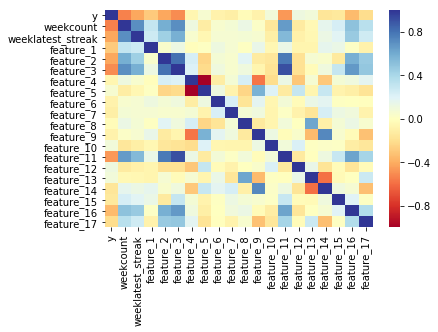

In [4223]:
gold_corr=gold.corr()
sns.heatmap(gold_corr, vmax=1., square=False,cmap="RdYlBu")

In [4224]:
gold.head(3)

,y,weekcount,weeklatest_streak,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
courier,,,,,,,,,,,,,,,,,,,,
3767,1,4,0,1.750000,45.500000,46.0,0.040700,0.959300,131.82820,0.059000,2107.008875,0.853000,8.413307,19.0,19.062094,5.192193,0.85645,36.042781,1.5,17.500000
6282,0,6,6,1.333333,36.666667,48.5,0.075517,0.924483,111.29100,0.063467,4300.183950,0.881117,8.317717,13.0,21.595879,5.379692,0.88055,72.957087,1.5,6.166667
10622,1,2,0,-3.500000,84.500000,54.0,0.119050,0.880950,100.15875,0.076200,2576.890500,0.623800,10.199895,20.5,21.568016,4.179873,0.66030,35.646190,2.5,15.500000


Text(0.5,1,'churned')

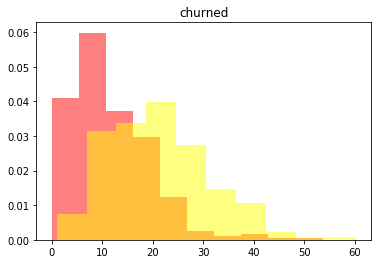

In [4225]:
plt.hist(gold[(gold.y==1)].feature_11,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_11,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

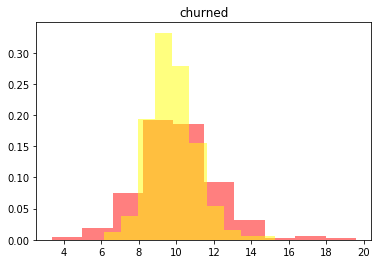

In [4226]:
plt.hist(gold[(gold.y==1)].feature_10,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_10,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

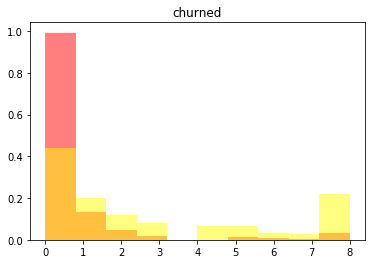

In [4227]:
plt.hist(gold[(gold.y==1)].weeklatest_streak,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].weeklatest_streak,alpha=0.5,color='yellow',density=1)
plt.title('churned')

plt.hist(gold[(gold.y==1)].weekmax_streak,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].weekmax_streak,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

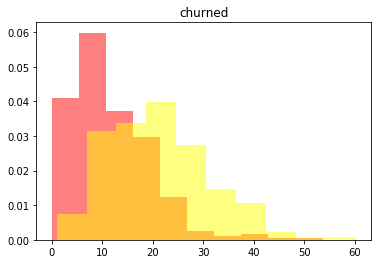

In [4228]:
plt.hist(gold[(gold.y==1)].feature_11,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_11,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

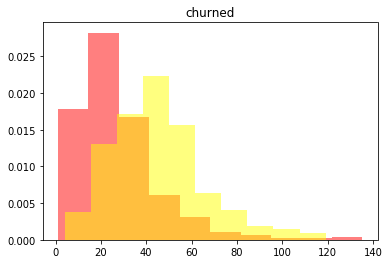

In [4229]:
plt.hist(gold[(gold.y==1)].feature_2,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_2,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

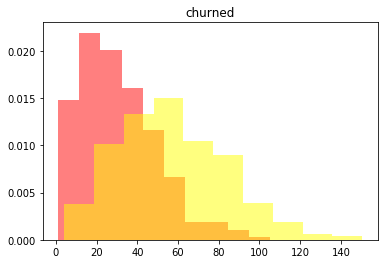

In [4230]:
plt.hist(gold[(gold.y==1)].feature_3,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_3,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

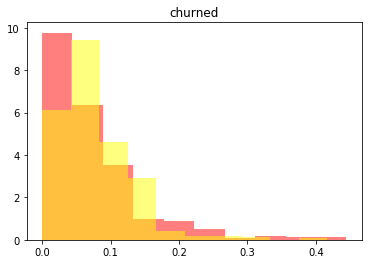

In [4231]:
plt.hist(gold[(gold.y==1)].feature_4,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_4,alpha=0.5,color='yellow',density=1)
plt.title('churned')

Text(0.5,1,'churned')

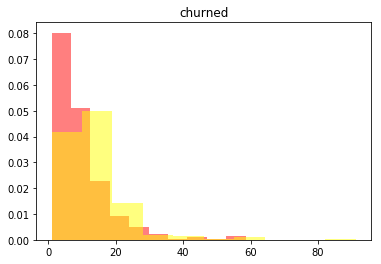

In [4232]:
plt.hist(gold[(gold.y==1)].feature_17,alpha=0.5,color='red',density=1)
plt.hist(gold[(gold.y==0)].feature_17,alpha=0.5,color='yellow',density=1)
plt.title('churned')

# there seems to be a difference between the distrobution  of feature 2. 3. and 11 per class

In [4233]:
golden_columns=gold.columns.tolist()

In [4234]:
gold.head()

,y,weekcount,weeklatest_streak,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
courier,,,,,,,,,,,,,,,,,,,,
3767,1,4,0,1.750000,45.500000,46.000,0.040700,0.959300,131.82820,0.059000,2107.008875,0.853000,8.413307,19.000,19.062094,5.192193,0.856450,36.042781,1.5,17.500000
6282,0,6,6,1.333333,36.666667,48.500,0.075517,0.924483,111.29100,0.063467,4300.183950,0.881117,8.317717,13.000,21.595879,5.379692,0.880550,72.957087,1.5,6.166667
10622,1,2,0,-3.500000,84.500000,54.000,0.119050,0.880950,100.15875,0.076200,2576.890500,0.623800,10.199895,20.500,21.568016,4.179873,0.660300,35.646190,2.5,15.500000
13096,0,2,0,0.000000,59.000000,89.500,0.161600,0.838400,104.29600,0.042800,4590.275250,0.686000,9.630672,34.500,17.902412,5.166684,0.720300,84.347978,3.0,19.000000
14261,1,8,8,-3.625000,75.500000,70.875,0.018425,0.981575,115.62990,0.122925,3870.750225,0.892537,10.001638,34.875,21.166889,5.433909,0.900662,49.311612,2.5,6.750000


In [4235]:
#gold=gold[['y','weekcount','weekmax_streak','weeklatest_streak','feature_5','feature_6','feature_9','feature_10','feature_12','feature_13','feature_14','feature_15']]

## Bringing lifetime info into the mix

In [4236]:
#adding lifetime info
lifetime = pd.read_csv(filepath_or_buffer='Courier_lifetime_data.csv')


In [4237]:
lifetime.head()

,courier,feature_1,feature_2
0,208,a,25.0
1,218,c,0.0
2,225,c,NaN
3,231,c,0.0
4,242,c,NaN


In [4238]:
lifetime.rename(columns={'feature_1':'lifetime_feature_1','feature_2':'lifetime_feature_2'}, inplace=True)

In [4239]:
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(lifetime['lifetime_feature_1'])
lifetime['lifetime_feature_1'] = gen_labels

In [4240]:
lifetime_encoded= pd.get_dummies(lifetime, columns=['lifetime_feature_1'])

In [4241]:
lifetime_encoded=lifetime.copy()

In [4242]:
lifetime_encoded.set_index('courier', inplace=True)

In [4243]:
lifetime_encoded.head()

,lifetime_feature_1,lifetime_feature_2
courier,,
208,0,25.0
218,2,0.0
225,2,NaN
231,2,0.0
242,2,NaN


In [4244]:
lifetime_encoded =  pd.DataFrame(KNN(k=1).fit_transform(lifetime_encoded), columns=lifetime_encoded.columns, index=lifetime_encoded.index) 

Imputing row 1/7524 with 0 missing, elapsed time: 5.937
Imputing row 101/7524 with 1 missing, elapsed time: 5.941
Imputing row 201/7524 with 1 missing, elapsed time: 5.945
Imputing row 301/7524 with 1 missing, elapsed time: 5.949
Imputing row 401/7524 with 0 missing, elapsed time: 5.953
Imputing row 501/7524 with 1 missing, elapsed time: 5.955
Imputing row 601/7524 with 0 missing, elapsed time: 5.957
Imputing row 701/7524 with 0 missing, elapsed time: 5.958
Imputing row 801/7524 with 0 missing, elapsed time: 5.959
Imputing row 901/7524 with 0 missing, elapsed time: 5.960
Imputing row 1001/7524 with 0 missing, elapsed time: 5.962
Imputing row 1101/7524 with 0 missing, elapsed time: 5.963
Imputing row 1201/7524 with 1 missing, elapsed time: 5.964
Imputing row 1301/7524 with 0 missing, elapsed time: 5.965
Imputing row 1401/7524 with 0 missing, elapsed time: 5.966
Imputing row 1501/7524 with 0 missing, elapsed time: 5.967
Imputing row 1601/7524 with 1 missing, elapsed time: 5.969
Imputing 

In [4245]:
#lifetime_encoded=lifetime_encoded.drop('feature_2', axis=1)

In [4246]:
gold=gold.merge(lifetime_encoded, how='left', left_index=True, right_index=True)


In [4247]:
gold.head()

,y,weekcount,weeklatest_streak,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,lifetime_feature_1,lifetime_feature_2
courier,,,,,,,,,,,,,,,,,,,,,
3767,1,4,0,1.750000,45.500000,46.000,0.040700,0.959300,131.82820,0.059000,...,8.413307,19.000,19.062094,5.192193,0.856450,36.042781,1.5,17.500000,1.0,33.0
6282,0,6,6,1.333333,36.666667,48.500,0.075517,0.924483,111.29100,0.063467,...,8.317717,13.000,21.595879,5.379692,0.880550,72.957087,1.5,6.166667,0.0,35.0
10622,1,2,0,-3.500000,84.500000,54.000,0.119050,0.880950,100.15875,0.076200,...,10.199895,20.500,21.568016,4.179873,0.660300,35.646190,2.5,15.500000,1.0,35.0
13096,0,2,0,0.000000,59.000000,89.500,0.161600,0.838400,104.29600,0.042800,...,9.630672,34.500,17.902412,5.166684,0.720300,84.347978,3.0,19.000000,0.0,35.0
14261,1,8,8,-3.625000,75.500000,70.875,0.018425,0.981575,115.62990,0.122925,...,10.001638,34.875,21.166889,5.433909,0.900662,49.311612,2.5,6.750000,0.0,44.0


### Using the selected features to impute the missing values from lifetime with KNN imputation 

In [4248]:
#gold =  pd.DataFrame(KNN(k=2).fit_transform(gold), columns=gold.columns, index=gold.index) 

In [4249]:
gold.head()

,y,weekcount,weeklatest_streak,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,lifetime_feature_1,lifetime_feature_2
courier,,,,,,,,,,,,,,,,,,,,,
3767,1,4,0,1.750000,45.500000,46.000,0.040700,0.959300,131.82820,0.059000,...,8.413307,19.000,19.062094,5.192193,0.856450,36.042781,1.5,17.500000,1.0,33.0
6282,0,6,6,1.333333,36.666667,48.500,0.075517,0.924483,111.29100,0.063467,...,8.317717,13.000,21.595879,5.379692,0.880550,72.957087,1.5,6.166667,0.0,35.0
10622,1,2,0,-3.500000,84.500000,54.000,0.119050,0.880950,100.15875,0.076200,...,10.199895,20.500,21.568016,4.179873,0.660300,35.646190,2.5,15.500000,1.0,35.0
13096,0,2,0,0.000000,59.000000,89.500,0.161600,0.838400,104.29600,0.042800,...,9.630672,34.500,17.902412,5.166684,0.720300,84.347978,3.0,19.000000,0.0,35.0
14261,1,8,8,-3.625000,75.500000,70.875,0.018425,0.981575,115.62990,0.122925,...,10.001638,34.875,21.166889,5.433909,0.900662,49.311612,2.5,6.750000,0.0,44.0


In [4250]:
gold_mt=gold.corr()
gold_mt

,y,weekcount,weeklatest_streak,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,lifetime_feature_1,lifetime_feature_2
y,1.000000,-0.534864,-0.415129,-0.287069,-0.420368,-0.502446,-0.056299,0.056297,-0.083037,-0.102526,...,0.086198,-0.464239,0.111303,0.089418,-0.163095,-0.144093,-0.346133,-0.205504,0.070673,-0.173707
weekcount,-0.534864,1.000000,0.706565,0.308786,0.590266,0.707429,0.111876,-0.111878,0.048195,0.076233,...,-0.150237,0.660209,-0.126081,-0.040001,0.163888,0.234505,0.504314,0.346470,-0.078835,0.211876
weeklatest_streak,-0.415129,0.706565,1.000000,0.267561,0.440527,0.582624,0.053173,-0.053172,0.062711,0.069250,...,-0.105659,0.539818,-0.090753,-0.048008,0.129388,0.182313,0.462136,0.264182,-0.105425,0.165258
feature_1,-0.287069,0.308786,0.267561,1.000000,0.042441,0.121433,-0.008686,0.008689,0.112640,0.067285,...,-0.053708,0.136845,-0.066519,-0.067824,0.158317,0.139243,0.015898,-0.085310,-0.000419,0.134841
feature_2,-0.420368,0.590266,0.440527,0.042441,1.000000,0.809809,0.239526,-0.239527,0.075706,0.047748,...,-0.151359,0.779639,-0.181660,0.065015,0.044204,-0.137879,0.580537,0.465973,-0.119320,0.144043
feature_3,-0.502446,0.707429,0.582624,0.121433,0.809809,1.000000,0.215887,-0.215886,0.102571,0.051864,...,-0.175278,0.920134,-0.184684,-0.023882,0.103955,0.301933,0.666711,0.481456,-0.168444,0.208765
feature_4,-0.056299,0.111876,0.053173,-0.008686,0.239526,0.215887,1.000000,-1.000000,-0.111039,0.078035,...,-0.206969,0.127558,-0.302300,0.065460,-0.293695,0.072747,0.105103,0.179467,-0.096329,0.085036
feature_5,0.056297,-0.111878,-0.053172,0.008689,-0.239527,-0.215886,-1.000000,1.000000,0.111040,-0.078025,...,0.206973,-0.127555,0.302297,-0.065465,0.293702,-0.072741,-0.105106,-0.179470,0.096329,-0.085034
feature_6,-0.083037,0.048195,0.062711,0.112640,0.075706,0.102571,-0.111039,0.111040,1.000000,0.227167,...,-0.059316,0.085749,-0.028160,0.134707,0.177765,0.008915,0.001523,-0.006208,0.008535,0.051206
feature_7,-0.102526,0.076233,0.069250,0.067285,0.047748,0.051864,0.078035,-0.078025,0.227167,1.000000,...,-0.063482,0.020889,-0.080034,-0.158228,0.238784,0.123961,0.095060,-0.072382,0.012397,0.211075


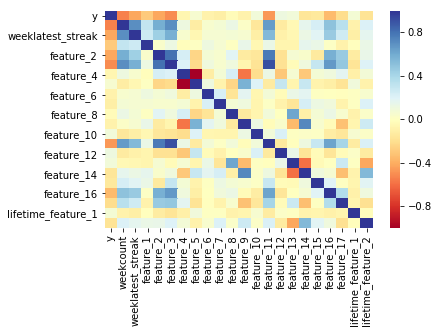

In [4251]:
sns.heatmap(gold_mt, vmax=1., square=False,cmap="RdYlBu")

In [4252]:
gold=gold.drop('feature_1',axis=1)

# We prepare the golden set

In [4253]:
golden_x= gold.drop(['y'], axis=1)
golden_y= gold['y']

In [4254]:
#golden_x =  pd.DataFrame(KNN(k=2).fit_transform(golden_x), columns=golden_x.columns, index=golden_x.index) 

In [4255]:
golden_x_mt=golden_x.corr()
golden_x_mt

,weekcount,weeklatest_streak,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,lifetime_feature_1,lifetime_feature_2
weekcount,1.000000,0.706565,0.590266,0.707429,0.111876,-0.111878,0.048195,0.076233,0.131002,0.027006,-0.150237,0.660209,-0.126081,-0.040001,0.163888,0.234505,0.504314,0.346470,-0.078835,0.211876
weeklatest_streak,0.706565,1.000000,0.440527,0.582624,0.053173,-0.053172,0.062711,0.069250,0.076391,0.055952,-0.105659,0.539818,-0.090753,-0.048008,0.129388,0.182313,0.462136,0.264182,-0.105425,0.165258
feature_2,0.590266,0.440527,1.000000,0.809809,0.239526,-0.239527,0.075706,0.047748,0.181976,-0.131530,-0.151359,0.779639,-0.181660,0.065015,0.044204,-0.137879,0.580537,0.465973,-0.119320,0.144043
feature_3,0.707429,0.582624,0.809809,1.000000,0.215887,-0.215886,0.102571,0.051864,0.106556,-0.064874,-0.175278,0.920134,-0.184684,-0.023882,0.103955,0.301933,0.666711,0.481456,-0.168444,0.208765
feature_4,0.111876,0.053173,0.239526,0.215887,1.000000,-1.000000,-0.111039,0.078035,0.237495,-0.576901,-0.206969,0.127558,-0.302300,0.065460,-0.293695,0.072747,0.105103,0.179467,-0.096329,0.085036
feature_5,-0.111878,-0.053172,-0.239527,-0.215886,-1.000000,1.000000,0.111040,-0.078025,-0.237496,0.576908,0.206973,-0.127555,0.302297,-0.065465,0.293702,-0.072741,-0.105106,-0.179470,0.096329,-0.085034
feature_6,0.048195,0.062711,0.075706,0.102571,-0.111039,0.111040,1.000000,0.227167,-0.167097,0.177938,-0.059316,0.085749,-0.028160,0.134707,0.177765,0.008915,0.001523,-0.006208,0.008535,0.051206
feature_7,0.076233,0.069250,0.047748,0.051864,0.078035,-0.078025,0.227167,1.000000,0.075268,0.106892,-0.063482,0.020889,-0.080034,-0.158228,0.238784,0.123961,0.095060,-0.072382,0.012397,0.211075
feature_8,0.131002,0.076391,0.181976,0.106556,0.237495,-0.237496,-0.167097,0.075268,1.000000,-0.133837,-0.068031,0.091907,0.001361,0.619658,-0.094674,0.074980,0.132124,0.050741,-0.084618,0.035144
feature_9,0.027006,0.055952,-0.131530,-0.064874,-0.576901,0.576908,0.177938,0.106892,-0.133837,1.000000,0.121930,-0.022411,0.040569,-0.345538,0.727094,0.050722,-0.028005,-0.324321,-0.069513,0.272357


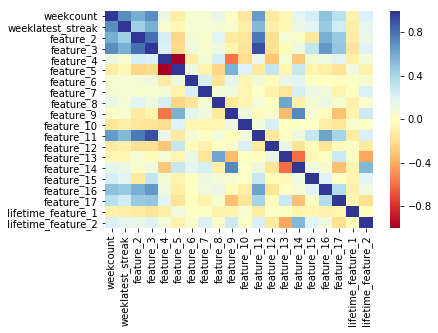

In [4256]:
sns.heatmap(golden_x_mt, vmax=1., square=False,cmap="RdYlBu")

In [4257]:
x_train, x_test, y_train, y_test = train_test_split(golden_x,golden_y , test_size=0.25)

In [4258]:
#x_train =  pd.DataFrame(KNN(k=3).fit_transform(x_train), columns=x_train.columns, index=x_train.index) 

In [4259]:
#x_test =  pd.DataFrame(KNN(k=3).fit_transform(x_test), columns=x_test.columns, index=x_test.index) 

In [4260]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# LogisticRegression

Accuracy of logistic regression classifier on test set: 0.70
             precision    recall  f1-score   support

          0       0.69      0.60      0.64        81
          1       0.71      0.78      0.75       102

avg / total       0.70      0.70      0.70       183



Text(0.5,15,'Predicted label')

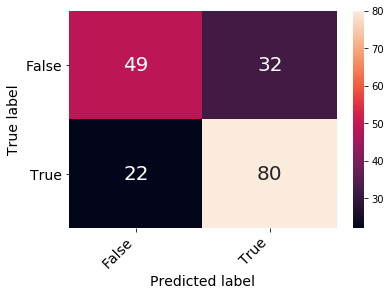

In [4261]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
test_y_pred = clf.predict(x_test)
cf_mt = confusion_matrix(y_test, test_y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))
print(classification_report(y_test, test_y_pred))
confusion_matrix_df = pd.DataFrame(cf_mt, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)


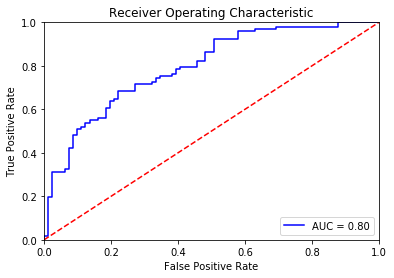

In [4262]:
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.82')

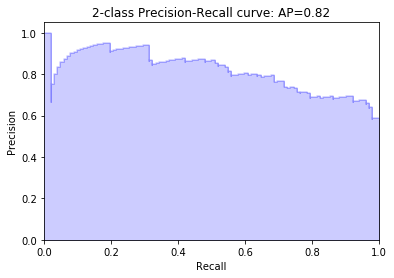

In [4263]:
average_precision = average_precision_score(y_test, preds)
precision, recall, _ = precision_recall_curve(y_test, preds)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Logistic regression grid search

In [4264]:

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.7564102564102564


Accuracy of logistic regression classifier on test set: 0.67
             precision    recall  f1-score   support

          0       0.66      0.54      0.59        81
          1       0.68      0.77      0.72       102

avg / total       0.67      0.67      0.67       183



Text(0.5,15,'Predicted label')

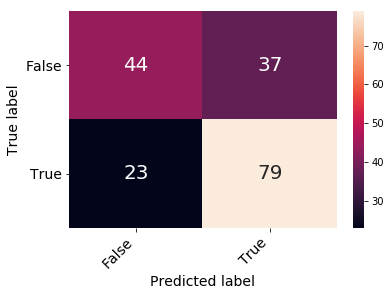

In [4265]:
test_y_pred = logreg_cv.predict(x_test)
cf_mt = confusion_matrix(y_test, test_y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_cv.score(x_test, y_test)))
print(classification_report(y_test, test_y_pred))
confusion_matrix_df = pd.DataFrame(cf_mt, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

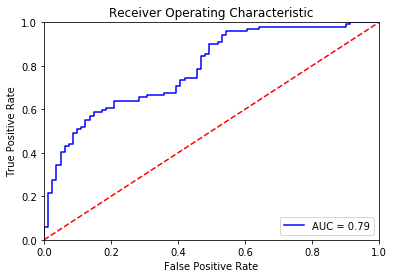

In [4266]:
probs = logreg_cv.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.82')

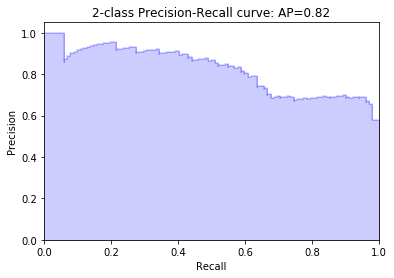

In [4267]:
average_precision = average_precision_score(y_test, preds)
precision, recall, _ = precision_recall_curve(y_test, preds)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Logistic cross validation score

0.6721311475409836
Accuracy: 0.711 (0.061)
Logloss: -0.601 (0.102)
AUC: 0.803 (0.087)


Text(0.5,15,'Predicted label')

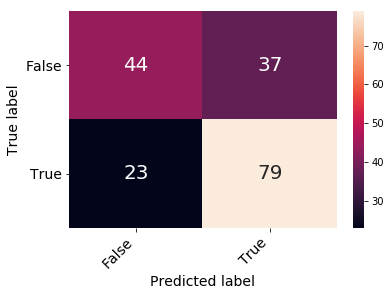

In [4268]:
logreg_cv.fit(x_train,y_train)
print(logreg_cv.score(x_test, y_test))
seed = 7
k_fold = KFold(n_splits=4, random_state=seed)
scoring = 'accuracy'
results=cross_val_score(logreg_cv, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
scoring = 'neg_log_loss'
results=cross_val_score(logreg_cv, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))
scoring = 'roc_auc'
results=cross_val_score(logreg_cv, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

predicted=logreg_cv.predict(x_test)
matrix = confusion_matrix(y_test, predicted)



confusion_matrix_df = pd.DataFrame(matrix, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

# XGBOOST Classifier

In [4269]:
xclas = XGBClassifier()  # and for classifier  
xclas.fit(x_train, y_train)  


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

             precision    recall  f1-score   support

          0       0.66      0.54      0.59        81
          1       0.68      0.77      0.72       102

avg / total       0.67      0.67      0.67       183



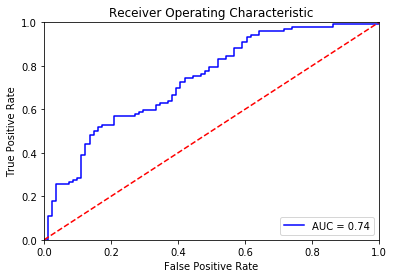

In [4270]:
probs = xclas.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print(classification_report(y_test, test_y_pred))
plt.show()

In [4271]:
from xgboost.sklearn import XGBRegressor  
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBRegressor(nthreads=-1)  

In [4272]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
gs.fit(x_train, y_train)  


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001458F806320>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001458F89AA58>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001458F7C91D0>, 'cols...40>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001458F80E240>},
          pre_dispatch='2*n_jobs', random_state=None, refit=Tr

In [4273]:
y_pred=gs.predict(x_test)  
predictions = [round(value) for value in y_pred]

In [4274]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.85%


             precision    recall  f1-score   support

          0       0.66      0.54      0.59        81
          1       0.68      0.77      0.72       102

avg / total       0.67      0.67      0.67       183



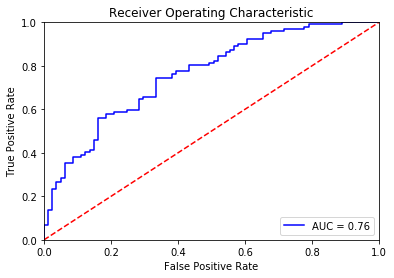

In [4275]:
preds = y_pred
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print(classification_report(y_test, test_y_pred))
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.80')

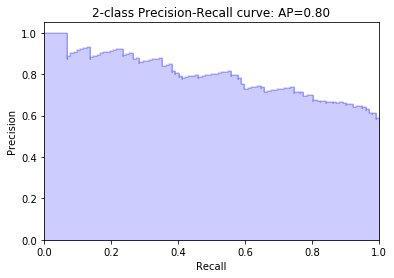

In [4276]:
average_precision = average_precision_score(y_test, preds)
precision, recall, _ = precision_recall_curve(y_test, preds)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# SVM

0.6775956284153005
Accuracy: 0.689 (0.122)
[[45 36]
 [23 79]]


Text(0.5,15,'Predicted label')

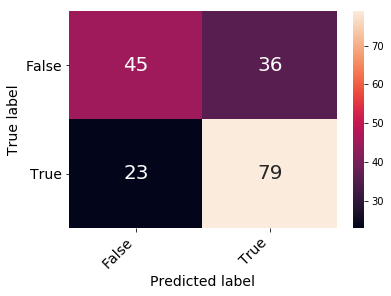

In [4277]:
clf = svm.SVC(C=1,kernel='rbf',probability=True,gamma='auto')
clf.fit(x_train,y_train)
print(clf.score(x_test, y_test))
seed = 7
k_fold = KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = results=cross_val_score(clf, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))


clf.fit(x_train,y_train)
predicted=clf.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)


confusion_matrix_df = pd.DataFrame(matrix, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

             precision    recall  f1-score   support

          0       0.66      0.54      0.59        81
          1       0.68      0.77      0.72       102

avg / total       0.67      0.67      0.67       183



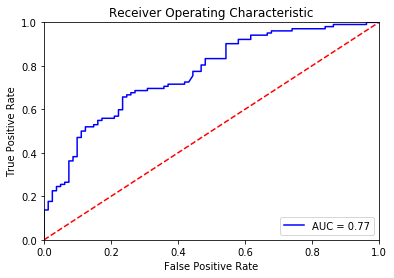

In [4278]:
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print(classification_report(y_test, test_y_pred))
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.81')

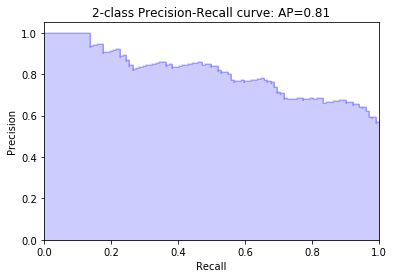

In [4279]:
average_precision = average_precision_score(y_test, preds)
precision, recall, _ = precision_recall_curve(y_test, preds)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Random Forest

In [4280]:
randomForest = RandomForestClassifier( max_depth=5, max_features=5, min_samples_split=10, n_estimators=100)
randomForest.fit(x_train, y_train)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(x_test, y_test)))

Accuracy of random forest classifier on test set: 0.66


In [4281]:
test_y_pred = randomForest.predict(x_test)
cf_mt = confusion_matrix(y_test, test_y_pred)
cf_mt

array([[47, 34],
       [28, 74]], dtype=int64)

0.6612021857923497
Accuracy: 0.782 (0.107)
Logloss: -0.548 (0.109)
AUC: 0.810 (0.103)
[[46 35]
 [29 73]]


Text(0.5,15,'Predicted label')

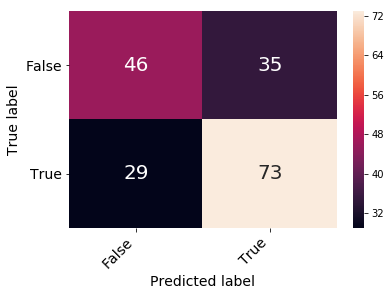

In [4282]:
print(randomForest.score(x_test, y_test))
seed = 7
k_fold = KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = results=cross_val_score(randomForest, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
scoring = 'neg_log_loss'
results = results=cross_val_score(randomForest, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))
scoring = 'roc_auc'
results = results=cross_val_score(randomForest, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

randomForest.fit(x_train,y_train)
predicted=randomForest.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)


confusion_matrix_df = pd.DataFrame(matrix, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

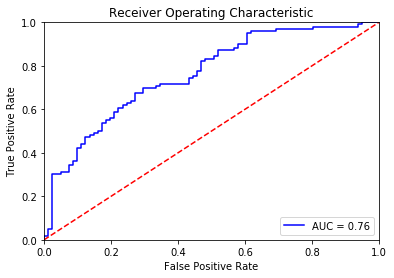

In [4283]:
probs = randomForest.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Feature ranking:
1. feature 0 (0.189313)
2. feature 3 (0.142068)
3. feature 11 (0.121152)
4. feature 2 (0.103532)
5. feature 6 (0.052070)
6. feature 7 (0.050926)
7. feature 1 (0.040045)
8. feature 16 (0.032984)
9. feature 10 (0.030654)
10. feature 19 (0.026166)
11. feature 14 (0.025657)
12. feature 13 (0.024806)
13. feature 15 (0.024494)
14. feature 5 (0.024461)
15. feature 17 (0.024387)
16. feature 8 (0.024338)
17. feature 4 (0.023820)
18. feature 9 (0.019477)
19. feature 12 (0.017899)
20. feature 18 (0.001753)


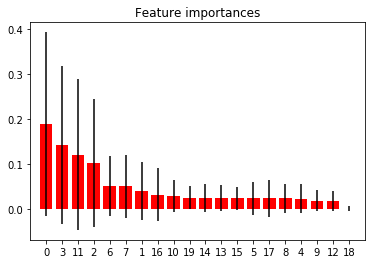

In [4284]:
importances = randomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(golden_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(golden_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(golden_x.shape[1]), indices)
plt.xlim([-1, golden_x.shape[1]])
plt.show()

In [4285]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5,10,15]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [4286]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(x_train, y_train)

    
    y_pred = grid_search.predict(x_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [4287]:
#grid_search_clf = grid_search_wrapper(refit_score='precision_score')

In [4288]:
# test

# bulding the encoded week dataset


In [4289]:
weeks.head(2)

,courier,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,label
0,3767,2,6,34,38,0.0789,0.9211,140.4737,0.1316,2162.4737,0.7632,7.340776,8,20.208158,5.236316,0.8158,43.384804,1,19,1
1,3767,4,-1,42,37,0.0000,1.0000,135.5946,0.0811,2097.4054,0.9459,11.883784,19,18.855405,5.689459,0.8919,35.078042,3,11,1


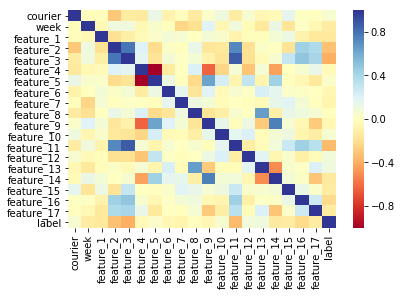

In [4290]:
sns.heatmap(week_corr, vmax=1., square=False,cmap="RdYlBu")

Text(0.5,1,'churned')

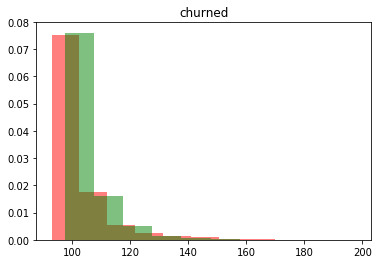

In [4291]:
#normalize histogram
plt.hist(weeks[(weeks.label==1)].feature_6,alpha=0.5,color='red',density=1)
plt.hist(weeks[(weeks.label==0)].feature_6,alpha=0.5,color='green',density=1)
plt.title('churned')

In [4292]:
transposed=weeks[['courier','week','feature_2','feature_3','feature_4','feature_6','feature_11','feature_14','label']]

In [4293]:
transposed= transposed.pivot(index='courier', columns='week')

In [4294]:
transposed.head()

feature_2                                           feature_3        \
week            0     1     2     3     4     5     6     7         0     1   
courier                                                                       
3767          NaN   NaN  34.0   NaN  42.0  41.0  65.0   NaN       NaN   NaN   
6282          NaN   NaN  33.0  42.0  22.0  31.0  52.0  40.0       NaN   NaN   
10622        82.0  87.0   NaN   NaN   NaN   NaN   NaN   NaN      45.0  63.0   
13096         NaN   NaN   NaN   NaN   NaN  64.0  54.0   NaN       NaN   NaN   
14261        79.0  83.0  67.0  69.0  72.0  79.0  78.0  77.0      59.0  72.0   

        ...  feature_14         label                                     
week    ...           6       7     0    1    2    3    4    5    6    7  
courier ...                                                               
3767    ...      0.7879     NaN   NaN  NaN  1.0  NaN  1.0  1.0  1.0  NaN  
6282    ...      0.8750  0.9107   NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0  
10622   ...         NaN     NaN   1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  
13096   ...      0.7143     NaN   NaN  NaN  NaN  NaN  NaN  0.0  0.0  NaN  
14261   ...      0.8873  0.9155   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 56 columns]

In [4295]:
transposed.columns = [transposed + '_' + i for transposed, i in zip(transposed.columns.get_level_values(0), transposed.columns.get_level_values(1).astype(str))]

In [4296]:
lifetime_encoded.head()

,lifetime_feature_1,lifetime_feature_2
courier,,
208,0.0,25.0
218,2.0,0.0
225,2.0,1.0
231,2.0,0.0
242,2.0,1.0


In [4297]:
transposed=transposed.merge(lifetime_encoded, how='inner', left_index=True, right_index=True)

In [4298]:
transposed_mt=transposed.corr()
transposed_mt.head()

,feature_2_0,feature_2_1,feature_2_2,feature_2_3,feature_2_4,feature_2_5,feature_2_6,feature_2_7,feature_3_0,feature_3_1,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,lifetime_feature_1,lifetime_feature_2
feature_2_0,1.000000,0.801489,0.766097,0.768833,0.724873,0.668988,0.590549,0.617081,0.762492,0.560584,...,-0.300145,-0.237013,-0.165193,-0.226290,-0.176775,-0.216571,-0.129751,-0.062112,-0.158570,0.137731
feature_2_1,0.801489,1.000000,0.788382,0.829026,0.775121,0.689991,0.615306,0.656815,0.562374,0.817980,...,-0.286281,-0.333828,-0.232789,-0.230952,-0.233946,-0.363225,-0.140431,-0.177850,-0.127114,0.163564
feature_2_2,0.766097,0.788382,1.000000,0.800345,0.759190,0.722014,0.634271,0.672459,0.538158,0.574893,...,-0.142269,-0.209203,-0.268662,-0.248781,-0.221281,-0.256947,-0.168553,-0.163476,-0.081170,0.156384
feature_2_3,0.768833,0.829026,0.800345,1.000000,0.815682,0.786801,0.717774,0.737004,0.479842,0.606246,...,-0.283643,-0.259584,-0.315927,-0.356148,-0.251216,-0.290158,-0.225581,-0.258938,-0.084864,0.154630
feature_2_4,0.724873,0.775121,0.759190,0.815682,1.000000,0.819073,0.768980,0.715267,0.520127,0.616727,...,-0.227880,-0.209794,-0.247977,-0.245183,-0.279875,-0.243639,-0.158652,-0.149964,-0.087439,0.137483


In [4299]:
def get_label(row):
    label=0
    for i in range(8):
        column='label_'+ str(i)
        if row[column]==1:
            label=1
    return label
        

In [4300]:
transposed['y']=transposed.apply(get_label,axis=1)

In [4301]:
transposed.drop(['label_0','label_1','label_2','label_3','label_4','label_5','label_6','label_7'], axis=1, inplace=True)

In [4302]:
transposed.head()

,feature_2_0,feature_2_1,feature_2_2,feature_2_3,feature_2_4,feature_2_5,feature_2_6,feature_2_7,feature_3_0,feature_3_1,...,feature_14_1,feature_14_2,feature_14_3,feature_14_4,feature_14_5,feature_14_6,feature_14_7,lifetime_feature_1,lifetime_feature_2,y
courier,,,,,,,,,,,,,,,,,,,,,
3767,NaN,NaN,34.0,NaN,42.0,41.0,65.0,NaN,NaN,NaN,...,NaN,0.8158,NaN,0.8919,0.9302,0.7879,NaN,1.0,33.0,1
6282,NaN,NaN,33.0,42.0,22.0,31.0,52.0,40.0,NaN,NaN,...,NaN,0.8889,0.9107,0.7813,0.9167,0.8750,0.9107,0.0,35.0,0
10622,82.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,63.0,...,0.6984,NaN,NaN,NaN,NaN,NaN,NaN,1.0,35.0,1
13096,NaN,NaN,NaN,NaN,NaN,64.0,54.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.7263,0.7143,NaN,0.0,35.0,0
14261,79.0,83.0,67.0,69.0,72.0,79.0,78.0,77.0,59.0,72.0,...,0.9167,0.9245,0.9605,0.9091,0.8442,0.8873,0.9155,0.0,44.0,1


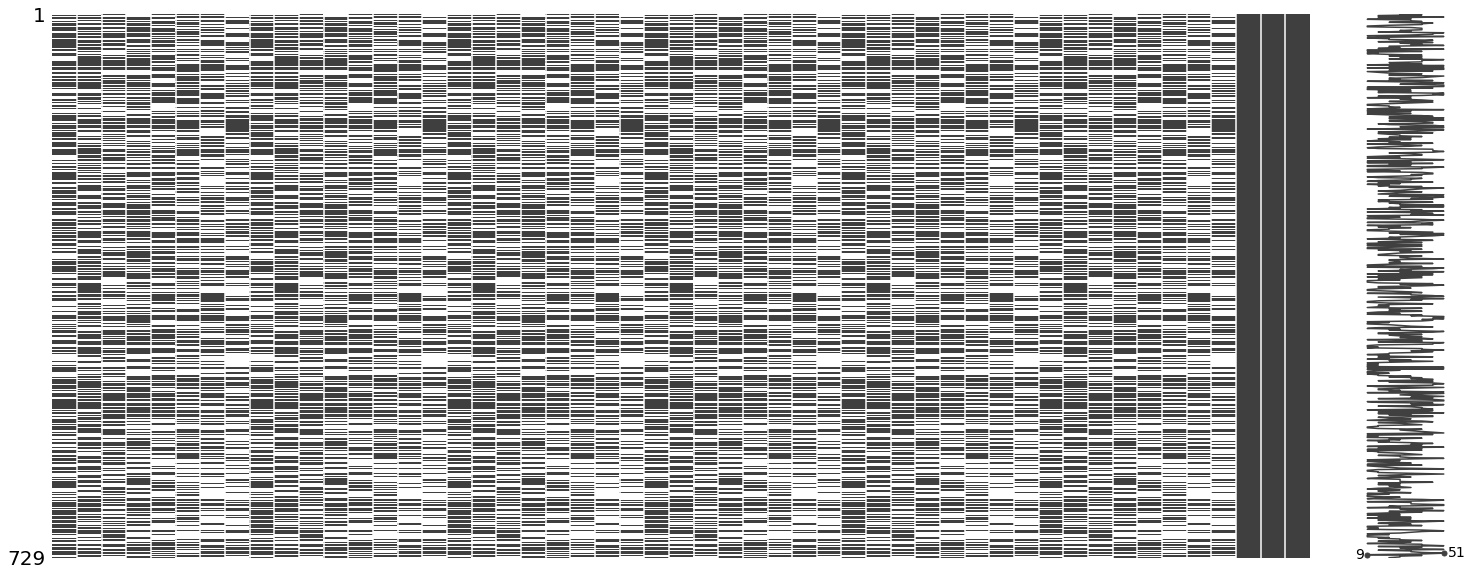

In [4303]:
msno.matrix(transposed)

In [4304]:
transposed_filled =  pd.DataFrame(KNN(k=2).fit_transform(transposed), columns=transposed.columns, index=transposed.index) 

Imputing row 1/729 with 24 missing, elapsed time: 0.247
Imputing row 101/729 with 42 missing, elapsed time: 0.276
Imputing row 201/729 with 6 missing, elapsed time: 0.309
Imputing row 301/729 with 24 missing, elapsed time: 0.341
Imputing row 401/729 with 42 missing, elapsed time: 0.378
Imputing row 501/729 with 0 missing, elapsed time: 0.413
Imputing row 601/729 with 36 missing, elapsed time: 0.446
Imputing row 701/729 with 42 missing, elapsed time: 0.489


In [4305]:
golden_x= transposed.drop(['y'], axis=1)
golden_y= transposed['y']

In [4306]:
x_train, x_test, y_train, y_test = train_test_split(golden_x,golden_y , test_size=0.25)

In [4307]:
x_train =  pd.DataFrame(KNN(k=2).fit_transform(x_train), columns=x_train.columns, index=x_train.index) 
x_test = pd.DataFrame(KNN(k=2).fit_transform(x_test), columns=x_test.columns, index=x_test.index) 

Imputing row 1/546 with 18 missing, elapsed time: 0.146
Imputing row 101/546 with 18 missing, elapsed time: 0.178
Imputing row 201/546 with 36 missing, elapsed time: 0.213
Imputing row 301/546 with 24 missing, elapsed time: 0.244
Imputing row 401/546 with 30 missing, elapsed time: 0.273
Imputing row 501/546 with 30 missing, elapsed time: 0.302
Imputing row 1/183 with 36 missing, elapsed time: 0.019
Imputing row 101/183 with 6 missing, elapsed time: 0.050


In [4308]:
golden_y.value_counts()

0    365
1    364
Name: y, dtype: int64

Accuracy of logistic regression classifier on test set: 0.57
             precision    recall  f1-score   support

          0       0.56      0.64      0.60        90
          1       0.59      0.51      0.55        93

avg / total       0.58      0.57      0.57       183



Text(0.5,15,'Predicted label')

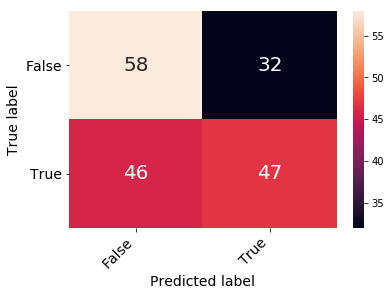

In [4309]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
test_y_pred = clf.predict(x_test)
cf_mt = confusion_matrix(y_test, test_y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))
print(classification_report(y_test, test_y_pred))
confusion_matrix_df = pd.DataFrame(cf_mt, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)


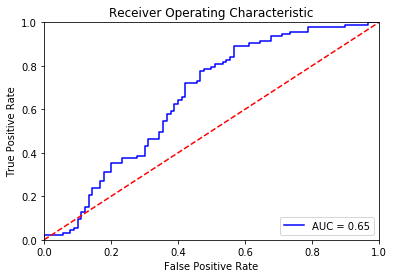

In [4310]:
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [4311]:
randomForest = RandomForestClassifier( max_depth=5, max_features=15, min_samples_split=5, n_estimators=100)
randomForest.fit(x_train, y_train)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(x_test, y_test)))

Accuracy of random forest classifier on test set: 0.64


In [ ]:
print(randomForest.score(x_test, y_test))
seed = 7
k_fold = KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = results=cross_val_score(randomForest, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
scoring = 'neg_log_loss'
results = results=cross_val_score(randomForest, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))
scoring = 'roc_auc'
results = results=cross_val_score(randomForest, x_test, y_test, cv=k_fold, n_jobs=1, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

randomForest.fit(x_train,y_train)
predicted=randomForest.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(classification_report(y_test, test_y_pred))


confusion_matrix_df = pd.DataFrame(matrix, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

0.639344262295082


In [ ]:
probs = randomForest.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
average_precision = average_precision_score(y_test, preds)
precision, recall, _ = precision_recall_curve(y_test, preds)
plt.step(recall, precision, color='b', alpha=0.2,  where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,   color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format( average_precision))

In [ ]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100,200, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5,10,15]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [ ]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(x_train, y_train)

    
    y_pred = grid_search.predict(x_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [ ]:
#grid_search_clf = grid_search_wrapper(refit_score='precision_score')

In [ ]:
xclas = XGBClassifier()  # and for classifier  
xclas.fit(x_train, y_train)  
probs = xclas.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print(classification_report(y_test, test_y_pred))
plt.show()

In [ ]:
test_y_pred = xclas.predict(x_test)
cf_mt = confusion_matrix(y_test, test_y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(xclas.score(x_test, y_test)))
print(classification_report(y_test, test_y_pred))
confusion_matrix_df = pd.DataFrame(cf_mt, ('False', 'True'), ('False', 'True'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [ ]:
average_precision = average_precision_score(y_test, preds)
precision, recall, _ = precision_recall_curve(y_test, preds)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))